In [2]:
"""Librairies nécessaires"""
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
"""Changement de directory pour lire les fichiers"""
import os
os.getcwd() #trouver le directory actuel 
os.chdir('/home/onyxia/work/Projet-Stat-App-2A')

In [45]:
"""Données administratives de paris intra muros"""
paris_arrondissement = gpd.read_file('2) Visualisation/Données_carto/paris_arrondissements.geojson')
paris_quartiers = gpd.read_file('2) Visualisation/Données_carto/paris_quartiers.geojson')
paris_quartiers = paris_quartiers[['c_quinsee', 'l_qu', 'geometry']]

In [58]:
"""Récupération des données dvf"""

path_dvf = '1.2) Données_concat/dvf_concat_total.geojson'
dvf = gpd.read_file(path_dvf)

In [66]:
"""Fonction traçant la carte du prix moyen par arrondissement parisien"""

def carte_prix_moyen_arrodissement(dvf):
    #dvf : geodataframe avec une colonne 'geometry'

    #on ne garde que les colonnes prix au m^2 et geometry
    dvf = dvf[['prix_au_m2_carrez', 'prix_au_m2_reel_bati', 'geometry']]  

    #on ajoute à chaque appartement les données administratives de son arrondissement
    dvf_geo = gpd.sjoin(dvf, paris_arrondissement, predicate = 'within')

    #regroupement selon les arrondissements et prix moyen au m2 carrez
    dvf_geo_group_carrez = (dvf_geo
      .groupby("INSEE_COG")
      .agg({"prix_au_m2_carrez": "mean"})
      .reset_index())

    #regroupement selon les arrondissements et prix moyen au m2 réel
    dvf_geo_group_reel = (dvf_geo
      .groupby("INSEE_COG")
      .agg({"prix_au_m2_reel_bati": "mean"})
      .reset_index())

    #on ajoute aux données administratives les prix moyens
    paris_arrondissement_count_carrez = paris_arrondissement.merge(
        dvf_geo_group_carrez
    ).to_crs(2154)

    paris_arrondissement_count_reel = paris_arrondissement.merge(
        dvf_geo_group_reel
    ).to_crs(2154)

    # Créez une figure avec deux sous-graphiques côte à côte
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Première carte (à gauche)
    paris_arrondissement_count_carrez.plot(ax=ax1, column="prix_au_m2_carrez", cmap="coolwarm", legend=True)
    ax1.set_title('Prix moyen du m^2 carrez - Carte 1')
    ax1.set_xticks([], [])
    ax1.set_yticks([], [])
    
    # Deuxième carte (à droite)
    paris_arrondissement_count_reel.plot(ax=ax2, column="prix_au_m2_reel_bati", cmap="coolwarm", legend=True)
    ax2.set_title('Prix moyen du m^2 reel bati - Carte 2')
    ax2.set_xticks([], [])
    ax2.set_yticks([], [])
    
    # Ajustez l'espacement entre les sous-graphiques
    plt.subplots_adjust(wspace=0.2)
    
    plt.show()
    
    # Enregistrez la figure dans le dossier spécifié
    output_folder = '2) Visualisation/Sorties_graph'
    output_filename = 'prix_moyen_arrondissements.png'
    output_path = os.path.join(output_folder, output_filename)
    
    # Assurez-vous que le dossier de sortie existe
    os.makedirs(output_folder, exist_ok=True)
    
    # Enregistrez la figure
    plt.savefig(output_path)

/opt/mamba/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/opt/mamba/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


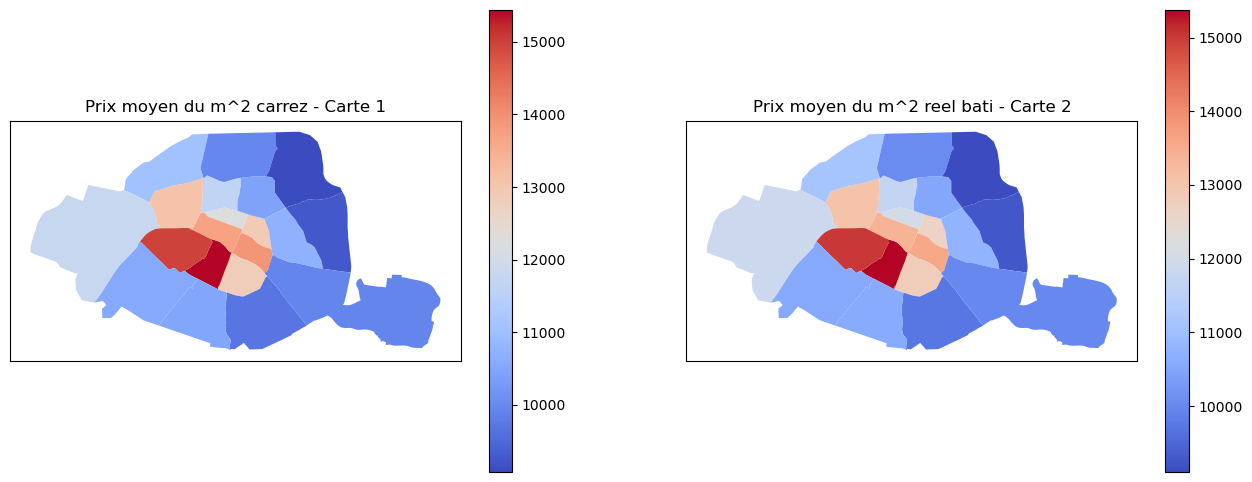

<Figure size 640x480 with 0 Axes>

In [67]:
"""Application de la fonction"""

carte_prix_moyen_arrodissement(dvf)

In [68]:
"""Fonction traçant la carte du prix moyen par arrondissement parisien"""

def carte_prix_moyen_quartier(dvf):
    #dvf : geodataframe avec une colonne 'geometry'

    #on ne garde que les colonnes prix au m^2 et geometry
    dvf = dvf[['prix_au_m2_carrez', 'prix_au_m2_reel_bati', 'geometry']]

    #on ajoute à chaque appartement les données administratives de son arrondissement
    dvf_geo = gpd.sjoin(dvf, paris_quartiers, predicate = 'within')

    #regroupement selon les arrondissements et prix moyen au m2 carrez
    dvf_geo_group_carrez = (dvf_geo
      .groupby("l_qu")
      .agg({"prix_au_m2_carrez": "mean"})
      .reset_index())

    #regroupement selon les arrondissements et prix moyen au m2 réel
    dvf_geo_group_reel = (dvf_geo
      .groupby("l_qu")
      .agg({"prix_au_m2_reel_bati": "mean"})
      .reset_index())

    #on ajoute aux données administratives les prix moyens
    paris_quartiers_count_carrez = paris_quartiers.merge(
        dvf_geo_group_carrez
    ).to_crs(2154)

    paris_quartiers_count_reel = paris_quartiers.merge(
        dvf_geo_group_reel
    ).to_crs(2154)

    # Créez une figure avec deux sous-graphiques côte à côte
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Première carte (à gauche)
    paris_quartiers_count_carrez.plot(ax=ax1, column="prix_au_m2_carrez", cmap="coolwarm", legend=True)
    ax1.set_title('Prix moyen du m^2 carrez - Carte 1')
    ax1.set_xticks([], [])
    ax1.set_yticks([], [])
    
    # Deuxième carte (à droite)
    paris_quartiers_count_reel.plot(ax=ax2, column="prix_au_m2_reel_bati", cmap="coolwarm", legend=True)
    ax2.set_title('Prix moyen du m^2 reel - Carte 2')
    ax2.set_xticks([], [])
    ax2.set_yticks([], [])

    plt.show()
    
    # Ajustez l'espacement entre les sous-graphiques
    plt.subplots_adjust(wspace=0.2)

    # Enregistrez la figure dans le dossier spécifié
    output_folder = '2) Visualisation/Sorties_graph'
    output_filename = 'prix_moyen_quartiers.png'
    output_path = os.path.join(output_folder, output_filename)
    
    # Assurez-vous que le dossier de sortie existe
    os.makedirs(output_folder, exist_ok=True)
    
    # Enregistrez la figure
    plt.savefig(output_path)

/opt/mamba/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/opt/mamba/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


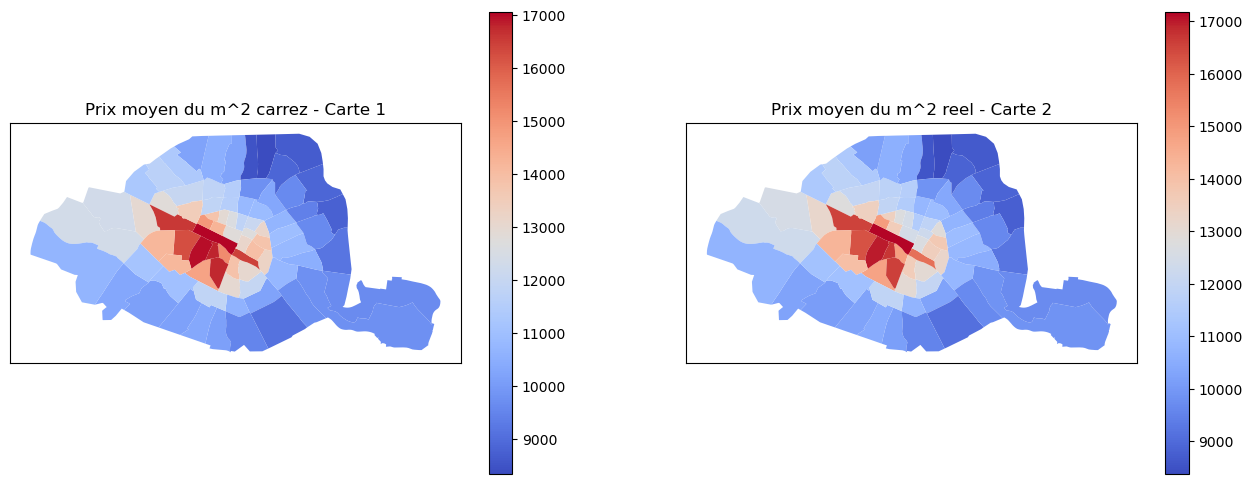

<Figure size 640x480 with 0 Axes>

In [69]:
carte_prix_moyen_quartier(dvf)

In [70]:
"""Evolution du prix moyen des appartements vendus, à une fréquence mensuelle"""

def evolution_prix_mensuel(dvf):
    #dvf : dataframe avec une colonne date_mutation et prix

    #ne garder que les colonnes utiles
    dvf = dvf.loc[:,['prix', 'date_mutation']]
    
    # Création d'une colonne au format datetime
    dvf['date_time'] = pd.to_datetime(dvf['date_mutation'])
    
    # Conversion de la colonne 'date_time' en format de période mensuelle
    dvf['mois'] = dvf['date_time'].dt.to_period('M')
    
    # Grouper par mois et calculer la moyenne des prix
    dvf_grouped = dvf.groupby('mois')['prix'].mean().reset_index()
    
    # Tracer l'évolution mensuelle des prix
    plt.figure(figsize=(10, 6))
    plt.plot(dvf_grouped['mois'].astype(str), dvf_grouped['prix'], marker='o', linestyle='-', color='b')
    
    # Diminuer la fréquence des étiquettes sur l'axe des x
    n = len(dvf_grouped['mois'])
    step = max(1, n // 10)  # Vous pouvez ajuster le pas selon vos besoins
    plt.xticks(dvf_grouped.index[::step], dvf_grouped['mois'].iloc[::step], rotation=45, ha='right')
    
    # Ajouter des étiquettes et un titre
    plt.xlabel('Mois')
    plt.ylabel('Prix moyen')
    plt.title('Évolution Mensuelle du prix moyen des appartements vendus à Paris depuis 2018')
    
    # Afficher la grille
    plt.grid(True)
    
    # Afficher le graphique
    plt.show()

    # Enregistrez la figure dans le dossier spécifié
    output_folder = '2) Visualisation/Sorties_graph'
    output_filename = 'evolution_mensuelle_prix.png'
    output_path = os.path.join(output_folder, output_filename)
    
    # Assurez-vous que le dossier de sortie existe
    os.makedirs(output_folder, exist_ok=True)
    
    # Enregistrez la figure
    plt.savefig(output_path)

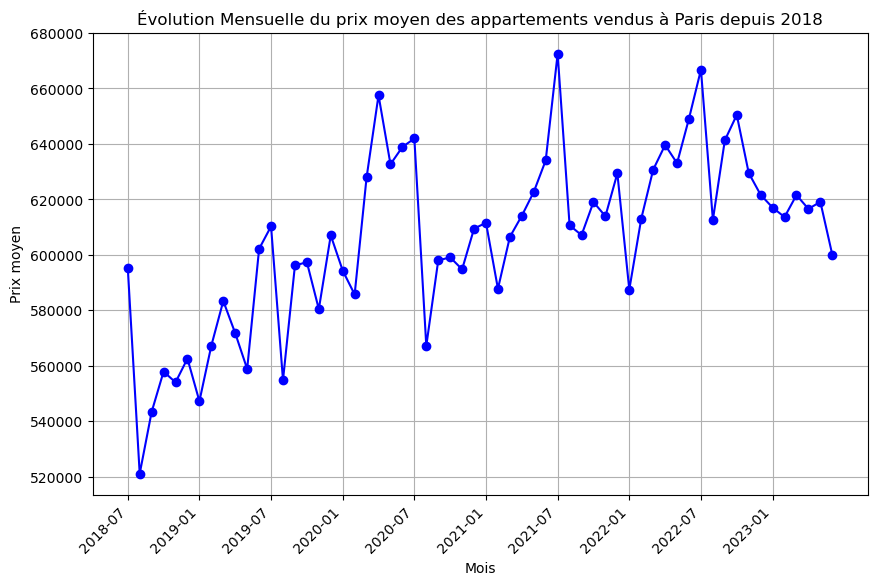

<Figure size 640x480 with 0 Axes>

In [71]:
evolution_prix_mensuel(dvf)

In [72]:
"""La même chose, mais en nombre de ventes, à une fréquence soit annuelle soit mensuelle"""

def evolution_nombre(dvf, freq):
    #dvf : dataframe avec une colonne date_mutation et prix
    # freq = "Année" ou "Mois"
    
    #ne garder que les colonnes utiles
    dvf = dvf.loc[:,['date_mutation']]
    
    #on met à jour la periode
    period = ''
    if freq == "Année":
        period = "Y"
    elif freq == "Mois":
        period = "M"

    #fréquence qui apparaîtra dans le titre du graphique 
    freq_titre = ''
    if freq == "Année":
        freq_titre = "annuelle"
    elif freq == "Mois":
        freq_titre = "mensuelle"

    #création d'une colonne au format date_time
    dvf['date_time'] = pd.to_datetime(dvf['date_mutation'])

    # Convertir la colonne 'date_time' en format de période mensuelle
    dvf[freq] = dvf['date_time'].dt.to_period(period)
    
    # Grouper par mois et calculer la moyenne des prix
    dvf_grouped = dvf.groupby(freq).size().reset_index(name='nombre de ventes')

    # Convertir en str
    dvf_grouped[freq] = dvf_grouped[freq].astype(str)
    
    # Tracer l'évolution mensuelle des prix
    plt.figure(figsize=(10, 6))
    plt.plot(dvf_grouped[freq], dvf_grouped['nombre de ventes'], marker='o', linestyle='-', color='b')
    
    # Diminuer la fréquence des étiquettes sur l'axe des x
    n = len(dvf_grouped[freq])
    step = max(1, n // 10)  # Vous pouvez ajuster le pas selon vos besoins
    plt.xticks(dvf_grouped.index[::step], dvf_grouped[freq].iloc[::step], rotation=45, ha='right')
        
    # Ajouter des étiquettes et un titre
    plt.xlabel(freq)
    plt.ylabel('Nombre de ventes')
    plt.title(f"Évolution {freq_titre} du nombre de ventes d'appartements à Paris depuis 2018")
    
    # Afficher la grille
    plt.grid(True)
    
    # Afficher le graphique
    plt.show()

    # Enregistrez la figure dans le dossier spécifié
    output_folder = '2) Visualisation/Sorties_graph'
    output_filename = f'evolution_{freq_titre}_nb_ventes.png'
    output_path = os.path.join(output_folder, output_filename)
    
    # Assurez-vous que le dossier de sortie existe
    os.makedirs(output_folder, exist_ok=True)
    
    # Enregistrez la figure
    plt.savefig(output_path)

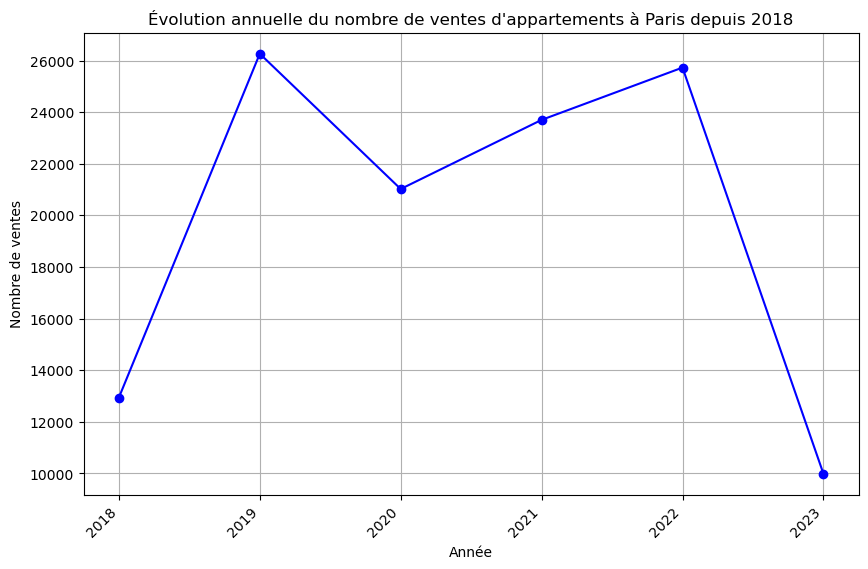

<Figure size 640x480 with 0 Axes>

In [74]:
evolution_nombre(dvf, "Année")

Sur ces graphiques, on voit qu'au mois d'août il y a quasiment toujours moins de ventes, et que le prix moyen des appartements vendus en août est également plus faible.
Et on voit qu'en 2020 il y a eu moins d'appartements vendus (en particulier pendant les mois COVID). On voit aussi qu'en 2023 le nombre de ventes diminue.